# Telecom Churn - Group Case Study

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [4]:
df = pd.read_csv('telecom_churn_data.csv')

## Exploration and Cleaning

### Shape and list of columns

In [5]:
#Shape of DataFrame 
df.shape

(99999, 226)

In [6]:
list(df.columns.values)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

### Filtering high-value customers
Since we have to work with only high-value customers data. We will filter rows accordingly here beforw we prepare and analyze the data and build the model.

In [7]:
# Checking columns for null values that are used in filtering high-value customers
print("Total Recharge Data 6th Month -",df['total_rech_data_6'].isnull().sum(),"\nAvg Recharge Amount Data 6th Month -", df['av_rech_amt_data_6'].isnull().sum(),
      "\nTotal Recharge Data 7th Month -",df['total_rech_data_7'].isnull().sum(),"\nAvg Recharge Amount Data 7th Month -", df['av_rech_amt_data_7'].isnull().sum())

Total Recharge Data 6th Month - 74846 
Avg Recharge Amount Data 6th Month - 74846 
Total Recharge Data 7th Month - 74428 
Avg Recharge Amount Data 7th Month - 74428


In [8]:
# There are a lot of nulls here. Imputing with zero
df.loc[df['total_rech_data_6'].isnull(),'total_rech_data_6'] = 0
df.loc[df['total_rech_data_7'].isnull(),'total_rech_data_7'] = 0
df.loc[df['av_rech_amt_data_6'].isnull(),'av_rech_amt_data_6'] = 0
df.loc[df['av_rech_amt_data_7'].isnull(),'av_rech_amt_data_7'] = 0

In [9]:
# Taking average total recharge amount for first 2 months.
df['tot_amt_data_6'] = df['total_rech_data_6']*df['av_rech_amt_data_6']
df['tot_amt_data_7'] = df['total_rech_data_7']*df['av_rech_amt_data_7']
df['avg_tot_rech_6&7'] = (df['total_rech_amt_6'] + df['tot_amt_data_6'] + df['total_rech_amt_7'] + df['tot_amt_data_7'])/4

In [10]:
df['avg_tot_rech_6&7'].describe(percentiles =[0.25,0.5,0.7,0.75,0.9])

count    99999.000000
mean       242.664034
std        434.711797
min          0.000000
25%         64.000000
50%        137.500000
70%        239.000000
75%        276.500000
90%        514.000000
max      30618.000000
Name: avg_tot_rech_6&7, dtype: float64

In [11]:
# Sanity check - Shape after filtering.
df.loc[df['avg_tot_rech_6&7']>=df['avg_tot_rech_6&7'].quantile(q=.7),:].shape

(30001, 229)

It looks good. we were suppose to get 29.9k rows. Correct as suggested by TA.

In [12]:
# Executing the filter.
df = df.loc[df['avg_tot_rech_6&7']>=df['avg_tot_rech_6&7'].quantile(q=.7),:]

In [13]:
# Fixing the index
df.reset_index(inplace=True, drop=True)
df.index

RangeIndex(start=0, stop=30001, step=1)

In [14]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_amt_data_6,tot_amt_data_7,avg_tot_rech_6&7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,279.5
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,592.5
2,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,1.0,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,348.0
3,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,320.0
4,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,291.5


### Info

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 229 entries, mobile_number to avg_tot_rech_6&7
dtypes: float64(182), int64(35), object(12)
memory usage: 52.4+ MB


### Describe

In [16]:
# Used .T to transpose so that we can scroll vertically instead horizontally
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,30001.0,7.001206e+09,690878.417340,7.000000e+09,7.000609e+09,7.001203e+09,7.001804e+09,7.002411e+09
circle_id,30001.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,29777.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,29777.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,29777.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,30001.0,5.584908e+02,460.640461,-2.258709e+03,3.098650e+02,4.816940e+02,6.999430e+02,2.773109e+04
arpu_7,30001.0,5.607822e+02,479.776947,-2.014045e+03,3.098260e+02,4.809430e+02,6.983150e+02,3.514583e+04
arpu_8,30001.0,5.085980e+02,501.961981,-9.458080e+02,2.314730e+02,4.275850e+02,6.614910e+02,3.354362e+04
arpu_9,30001.0,4.671242e+02,501.568240,-1.899505e+03,1.896070e+02,3.878170e+02,6.261630e+02,3.880562e+04
onnet_mou_6,29456.0,2.656183e+02,462.493645,0.000000e+00,1.924000e+01,8.806000e+01,2.974150e+02,7.376710e+03


### Nulls column wise

In [17]:
# Lets check for null values
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                224
std_og_t2o_mou                224
loc_ic_t2o_mou                224
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
last_date_of_month_9          365
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                   545
onnet_mou_7                   537
onnet_mou_8                  1174
onnet_mou_9                  1901
offnet_mou_6                  545
offnet_mou_7                  537
offnet_mou_8                 1174
offnet_mou_9                 1901
roam_ic_mou_6                 545
roam_ic_mou_7                 537
roam_ic_mou_8                1174
roam_ic_mou_9                1901
roam_og_mou_6                 545
roam_og_mou_7                 537
roam_og_mou_8                1174
roam_og_mou_9                1901
loc_og_t2t_mou

`Note:` We will treat the nulls and other stuff only after getting our target churn

### Tagging Churners
Since features for tagging churners are -<br>
`total_ic_mou_9`<br>
`total_og_mou_9`<br>
`vol_2g_mb_9`<br>
`vol_3g_mb_9`<br>
We can tag churners and drop features with 9s since these 4 features dont have any null values.

In [18]:
# checking the four columns since we will use them for tagging churners
df['total_ic_mou_9'].value_counts().head()

0.00     2994
0.58       10
0.33        8
72.38       7
53.38       7
Name: total_ic_mou_9, dtype: int64

In [19]:
df['total_og_mou_9'].value_counts().head()

0.00    3885
0.21      26
0.61      12
0.20      10
0.41      10
Name: total_og_mou_9, dtype: int64

In [20]:
df['vol_2g_mb_9'].value_counts().head()

0.00    16920
0.01       60
0.04       38
0.02       36
0.03       35
Name: vol_2g_mb_9, dtype: int64

In [21]:
df['vol_3g_mb_9'].value_counts().head()

0.00    19934
0.01        9
0.02        9
0.04        8
0.03        6
Name: vol_3g_mb_9, dtype: int64

Churned customer is one with all four columns with zero. This means we will get max 2994 churns (could be less). Lets see.

In [22]:
# sanity check - Checking the number of churns
df.loc[(df['total_ic_mou_9']==0) & 
(df['total_og_mou_9']==0)  &
(df['vol_2g_mb_9']==0)     &
(df['vol_3g_mb_9']==0),:].shape

(2441, 229)

In [23]:
# Setting churn to 0 for all rows
df['churn'] = 0

In [24]:
# Filter churn rows and set churn column to 1 for them
df.loc[(df['total_ic_mou_9']==0) & 
(df['total_og_mou_9']==0)  &
(df['vol_2g_mb_9']==0)     &
(df['vol_3g_mb_9']==0),'churn'] = 1

In [25]:
df['churn'].sum()

2441

### Dropping columns with 9

In [26]:
# Column names with 9 in them
['9' in x for x in df.columns].count(True)

54

There are 54 columns with _9 in them

In [27]:
# sanity check - checking the shape after dropping cols
df.iloc[:,['9' not in x for x in df.columns]].shape

(30001, 176)

In [28]:
df = df.iloc[:,['9' not in x for x in df.columns]]

In [29]:
# MISSED column for last month - sep_vbc_3g - It was missed since it does not have 9 in label
df = df.drop('sep_vbc_3g', axis=1)

### Analyzing the Columns

#### mobile_number

In [30]:
# data has 30001 rows and same unique mobile numbers
# No duplicates and this can act as ID for each row.
df.mobile_number.nunique()

30001

In [31]:
# But this also means it is of no use in prediction.
# Adding it to to_drop list which will drop all columns at once
df.drop('mobile_number', axis=1, inplace=True)

#### circle_id

In [32]:
df['circle_id'].value_counts()

109    30001
Name: circle_id, dtype: int64

In [33]:
# No variation. Provided is for only one circle. Hence useless feature.
df.drop('circle_id', axis=1, inplace=True)

#### loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
All three of these features have same number of nulls. I wont be surprised if same rows have nulls in all three at once.

In [34]:
df['loc_og_t2o_mou'].value_counts(dropna=False)

0.0    29777
NaN      224
Name: loc_og_t2o_mou, dtype: int64

This means either `loc_og_t2o_mou` is zero or null. Lets check if it is same for other 2 features also.

In [35]:
df['std_og_t2o_mou'].value_counts(dropna=False)

0.0    29777
NaN      224
Name: std_og_t2o_mou, dtype: int64

In [36]:
df['loc_ic_t2o_mou'].value_counts(dropna=False)

0.0    29777
NaN      224
Name: loc_ic_t2o_mou, dtype: int64

In [37]:
# Useless features. dropping them.
df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou'], axis=1, inplace=True)

#### last_date_of_month_6, last_date_of_month_7, last_date_of_month_8

In [38]:
df['last_date_of_month_6'].value_counts(dropna=False)

6/30/2014    30001
Name: last_date_of_month_6, dtype: int64

In [39]:
df['last_date_of_month_7'].value_counts(dropna=False)

7/31/2014    29974
NaN             27
Name: last_date_of_month_7, dtype: int64

In [40]:
df['last_date_of_month_8'].value_counts(dropna=False)

8/31/2014    29836
NaN            165
Name: last_date_of_month_8, dtype: int64

The dates are same for every row. Again useless features. Dropping them.

In [41]:
df.drop(['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8'], axis=1, inplace=True)

#### arpu for all months 6, 7, 8
There are no null values so we explore

In [42]:
df['arpu_6'].describe()

count    30001.000000
mean       558.490824
std        460.640461
min      -2258.709000
25%        309.865000
50%        481.694000
75%        699.943000
max      27731.088000
Name: arpu_6, dtype: float64

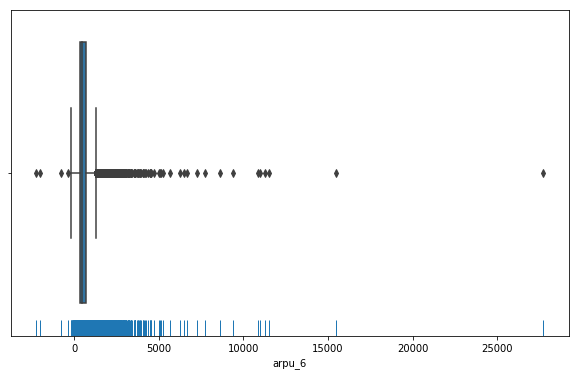

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(df['arpu_6'])
sns.distplot(df['arpu_6'], hist=False, rug=True, kde=False)
plt.show()

`Negative Values` - There are some negatives values too in this. <br>
`Very High Values` - We need to fix this.

In [44]:
# Lets check how many values are negative here.
df.loc[df['arpu_6']<0,:].shape, df.loc[df['arpu_7']<0,:].shape, df.loc[df['arpu_8']<0,:].shape

((39, 167), (50, 167), (90, 167))

This is very less number of rows and we can safely impute them with zeros because arpu is not suppose to be negative.

In [45]:
# Making all negative values null then will impute them with zeros later
df.loc[df['arpu_6']<0,'arpu_6'] = df.loc[df['arpu_7']<0,'arpu_7'] = df.loc[df['arpu_8']<0,'arpu_8'] = 0

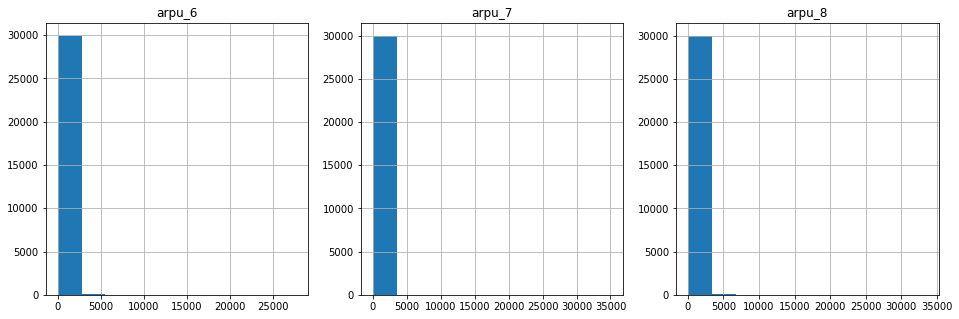

In [46]:
# Histogram of arpu excluding outlier values
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
df['arpu_6'].hist()
plt.title('arpu_6')

plt.subplot(1,3,2)
df['arpu_7'].hist()
plt.title('arpu_7')

plt.subplot(1,3,3)
df['arpu_8'].hist()
plt.title('arpu_8')

plt.show()

In [47]:
# These distribution plots needs a log transformation. So we will do a log(x+1) since we got zeroes also.
df.loc[:,['arpu_6','arpu_7','arpu_8']] = df.loc[:,['arpu_6','arpu_7','arpu_8']].apply(lambda x: np.log(x+1))

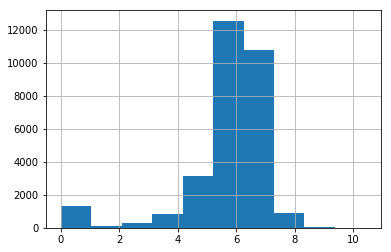

In [48]:
# Just to check if this will work
df['arpu_8'].hist()

#### Lets prepare all the "mou" together

In [49]:
# Geting the list of columns that contain mou
mou_list = ['mou' in x for x in df.columns]
mou_list.count(True)

87

In [50]:
# Describing the list of columns with mou
df.iloc[:, mou_list].describe().T

,count,mean,std,min,25%,50%,75%,max
onnet_mou_6,29456.0,265.618262,462.493645,0.0,19.2400,88.060,297.4150,7376.71
onnet_mou_7,29464.0,272.700470,482.972367,0.0,18.1550,86.885,298.0875,8157.78
onnet_mou_8,28827.0,243.646938,465.200856,0.0,14.2550,72.930,255.0250,10752.56
offnet_mou_6,29456.0,380.608111,484.257474,0.0,78.5750,229.635,494.7800,8362.36
offnet_mou_7,29464.0,384.994337,500.807874,0.0,76.0400,227.120,500.3650,9667.13
offnet_mou_8,28827.0,348.723294,486.918550,0.0,58.6700,197.590,455.3850,14007.34
roam_ic_mou_6,29456.0,16.408431,76.973057,0.0,0.0000,0.000,0.0000,2613.31
roam_ic_mou_7,29464.0,12.872921,76.454034,0.0,0.0000,0.000,0.0000,3813.29
roam_ic_mou_8,28827.0,13.009645,75.575865,0.0,0.0000,0.000,0.0000,4169.81
roam_og_mou_6,29456.0,27.063178,117.218920,0.0,0.0000,0.000,0.0000,3775.11


All these features need log transformation since difference between 75%ile and max values is very high and no need to fix negatives as there are not present.

In [51]:
# Filling nan values with 0

df.iloc[:,mou_list] = df.iloc[:,mou_list].fillna(value=0)

# Transforming the values with log(x+1)
df.iloc[:,mou_list] = df.iloc[:,mou_list].apply(lambda x: np.log(x+1))
df.iloc[:,mou_list].describe().T

,count,mean,std,min,25%,50%,75%,max
onnet_mou_6,30001.0,4.125735,2.074113,0.0,2.894806,4.449452,5.674834,8.906219
onnet_mou_7,30001.0,4.114148,2.098791,0.0,2.834976,4.428552,5.674148,9.006850
onnet_mou_8,30001.0,3.853520,2.170104,0.0,2.432736,4.198855,5.484631,9.282992
offnet_mou_6,30001.0,4.991953,1.794686,0.0,4.285103,5.409590,6.192240,9.031616
offnet_mou_7,30001.0,4.981282,1.813884,0.0,4.261411,5.398298,6.204578,9.176590
offnet_mou_8,30001.0,4.688831,2.002063,0.0,3.865770,5.213794,6.086525,9.547408
roam_ic_mou_6,30001.0,0.676298,1.495083,0.0,0.000000,0.000000,0.000000,7.868755
roam_ic_mou_7,30001.0,0.532923,1.342399,0.0,0.000000,0.000000,0.000000,8.246510
roam_ic_mou_8,30001.0,0.549616,1.349608,0.0,0.000000,0.000000,0.000000,8.335866
roam_og_mou_6,30001.0,0.787715,1.694922,0.0,0.000000,0.000000,0.000000,8.236450


#### og_others and ic_others feature for 6, 7, 8

In [52]:
# Geting the list of columns that contain 'other'
other_list = ['others' in x for x in df.columns]
other_list.count(True)

6

In [53]:
# Describing the list of columns with 'other'
df.iloc[:, other_list].describe().T

,count,mean,std,min,25%,50%,75%,max
og_others_6,29456.0,0.673323,4.144797,0.0,0.0,0.0,0.00,609.81
og_others_7,29464.0,0.043687,2.701071,0.0,0.0,0.0,0.00,370.13
og_others_8,28827.0,0.059953,3.381939,0.0,0.0,0.0,0.00,394.93
ic_others_6,29456.0,1.174790,14.113843,0.0,0.0,0.0,0.06,1344.14
ic_others_7,29464.0,1.527682,16.141140,0.0,0.0,0.0,0.00,1495.94
ic_others_8,28827.0,1.274322,13.038515,0.0,0.0,0.0,0.06,1209.86


In [54]:
# Similar treatment of columns with mou, we will transform with log(x+1)
df.iloc[:,other_list] = df.iloc[:,other_list].fillna(value=0).apply(lambda x: np.log(x+1))
df.iloc[:, other_list].describe().T

,count,mean,std,min,25%,50%,75%,max
og_others_6,30001.0,0.251540,0.553145,0.0,0.0,0.0,0.00000,6.414786
og_others_7,30001.0,0.005616,0.109728,0.0,0.0,0.0,0.00000,5.916552
og_others_8,30001.0,0.006603,0.122391,0.0,0.0,0.0,0.00000,5.981237
ic_others_6,30001.0,0.221637,0.603785,0.0,0.0,0.0,0.04879,7.204253
ic_others_7,30001.0,0.249858,0.668778,0.0,0.0,0.0,0.00000,7.311178
ic_others_8,30001.0,0.226999,0.623701,0.0,0.0,0.0,0.00000,7.099086


#### total_rech_num for 6, 7, 8

In [55]:
#Creating list with total_rech_num for 6, 7, 8
tot_rech_num_list = ['total_rech_num_6', 'total_rech_num_7','total_rech_num_8']

In [56]:
# Describing the list to check the variance
df.loc[:,tot_rech_num_list].describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_num_6,30001.0,11.851005,9.429132,0.0,6.0,9.0,15.0,307.0
total_rech_num_7,30001.0,11.718843,9.432418,0.0,6.0,9.0,15.0,138.0
total_rech_num_8,30001.0,9.972868,9.274370,0.0,4.0,8.0,13.0,196.0


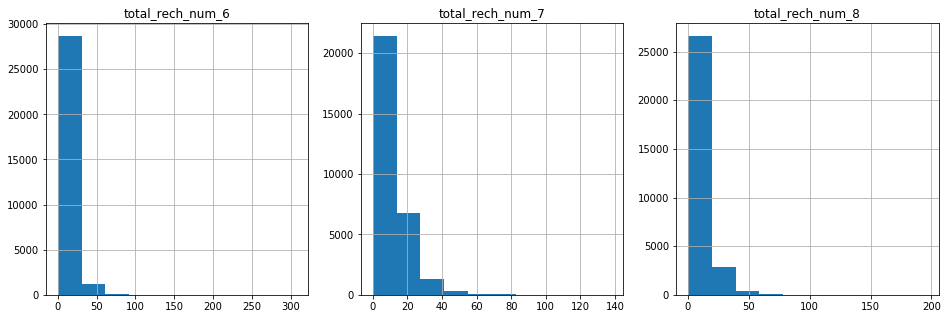

In [57]:
#Plotting the distogram for 
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
df['total_rech_num_6'].hist()
plt.title('total_rech_num_6')

plt.subplot(1,3,2)
df['total_rech_num_7'].hist()
plt.title('total_rech_num_7')

plt.subplot(1,3,3)
df['total_rech_num_8'].hist()
plt.title('total_rech_num_8')

plt.show()

In [58]:
# Transformation using log(x+1)
df.loc[:,tot_rech_num_list] = df.loc[:,tot_rech_num_list].fillna(value=0).apply(lambda x: np.log(x+1))

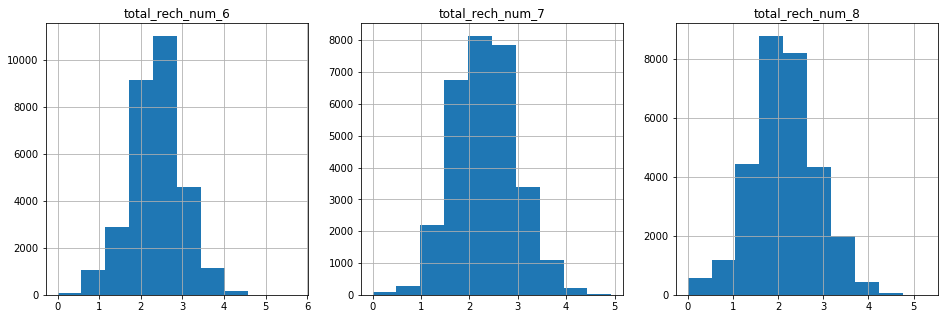

In [59]:
# After log transform taking 
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
df['total_rech_num_6'].hist()
plt.title('total_rech_num_6')

plt.subplot(1,3,2)
df['total_rech_num_7'].hist()
plt.title('total_rech_num_7')

plt.subplot(1,3,3)
df['total_rech_num_8'].hist()
plt.title('total_rech_num_8')

plt.show()

#### total_rech_amt and max_rech_amt for 6, 7, 8

In [60]:
# Creating a list with column names for total_rech_amt and max_rech_amt for 6, 7, 8 months
feat_list = ['total_rech_amt_'+str(x) for x in range(6,9)] + ['max_rech_amt_'+str(x) for x in range(6,9)]

In [61]:
# Describing ti checn the distribution 
df.loc[:,feat_list].describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_amt_6,30001.0,660.732342,561.032865,0.0,360.0,566.0,834.0,35190.0
total_rech_amt_7,30001.0,660.498017,582.430876,0.0,352.0,562.0,831.0,40335.0
total_rech_amt_8,30001.0,584.365454,611.245907,0.0,250.0,490.0,776.0,45320.0
max_rech_amt_6,30001.0,169.284824,175.315958,0.0,110.0,120.0,200.0,4010.0
max_rech_amt_7,30001.0,172.201727,181.390742,0.0,110.0,128.0,200.0,4010.0
max_rech_amt_8,30001.0,160.144462,173.207799,0.0,50.0,130.0,198.0,4449.0


In [62]:
# Transformation using log(x+1)
df.loc[:,feat_list] = df.loc[:,feat_list].fillna(value=0).apply(lambda x: np.log(x+1))

#### date_of_last_rech for 6, 7, 8

In [63]:
df['date_of_last_rech_6'].head()

0    6/21/2014
1    6/27/2014
2    6/25/2014
3    6/30/2014
4    6/18/2014
Name: date_of_last_rech_6, dtype: object

In [64]:
for x in range(6,9):
    df['date_of_last_rech_'+str(x)] = pd.to_datetime(df['date_of_last_rech_'+str(x)], format='%m/%d/%Y')

In [65]:
df.loc[:,['date_of_last_rech_'+str(x) for x in range(6,9)]].describe().T

,count,unique,top,freq,first,last
date_of_last_rech_6,29928,30,2014-06-30 00:00:00,8376,2014-06-01 00:00:00,2014-06-30 00:00:00
date_of_last_rech_7,29903,31,2014-07-31 00:00:00,7610,2014-07-01 00:00:00,2014-07-31 00:00:00
date_of_last_rech_8,29418,31,2014-08-31 00:00:00,6200,2014-08-01 00:00:00,2014-08-31 00:00:00


In [66]:
df['date_diff_6_7'] = df['date_of_last_rech_7'] - df['date_of_last_rech_6']
df['date_diff_7_8'] = df['date_of_last_rech_8'] - df['date_of_last_rech_7']

In [67]:
df.loc[(df['date_diff_6_7']<=np.timedelta64(1,'D')) | (df['date_diff_7_8']<=np.timedelta64(1,'D')),['date_diff_6_7','date_diff_7_8','churn']]

,date_diff_6_7,date_diff_7_8,churn
145,33 days,1 days,1
2216,31 days,1 days,1
3240,1 days,55 days,0
8024,39 days,1 days,1
9977,1 days,55 days,1
18966,32 days,1 days,1
20014,1 days,NaT,1
23965,39 days,1 days,0


In [68]:
# Dropping these dates for now
df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_diff_6_7','date_diff_7_8'], axis=1, inplace=True)

#### Remaining Features to transform

Lets inspect all remaining features and see if all needs same transformation and null treatment then we might as well do it in one go.

In [69]:
list(df.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'to

We have to inspect and transform features starting from `last_day_rch_amt_6`

In [70]:
list(df.columns).index('last_day_rch_amt_6')

105

In [71]:
remain_list = list(df.columns)[105:]

In [72]:
df.loc[:,remain_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 59 columns):
last_day_rch_amt_6          30001 non-null int64
last_day_rch_amt_7          30001 non-null int64
last_day_rch_amt_8          30001 non-null int64
date_of_last_rech_data_6    16756 non-null object
date_of_last_rech_data_7    17057 non-null object
date_of_last_rech_data_8    15953 non-null object
total_rech_data_6           30001 non-null float64
total_rech_data_7           30001 non-null float64
total_rech_data_8           15953 non-null float64
max_rech_data_6             16756 non-null float64
max_rech_data_7             17057 non-null float64
max_rech_data_8             15953 non-null float64
count_rech_2g_6             16756 non-null float64
count_rech_2g_7             17057 non-null float64
count_rech_2g_8             15953 non-null float64
count_rech_3g_6             16756 non-null float64
count_rech_3g_7             17057 non-null float64
count_rech_3g_8             15953

Only three columns among reamaining are `object`. Lets look at them later. Dropping them from `remain_list`

In [73]:
remain_list.remove('date_of_last_rech_data_6')
remain_list.remove('date_of_last_rech_data_7')
remain_list.remove('date_of_last_rech_data_8')

In [74]:
# Dropping churn and other extra columns that don't need transformation.
remain_list = remain_list[:-4]

In [75]:
df.loc[:,remain_list].describe().T

,count,mean,std,min,25%,50%,75%,max
last_day_rch_amt_6,30001.0,100.893604,143.737572,0.00,25.00,67.000,120.0000,4010.00
last_day_rch_amt_7,30001.0,100.356021,140.925669,0.00,20.00,50.000,130.0000,4010.00
last_day_rch_amt_8,30001.0,92.393654,145.182324,0.00,0.00,50.000,130.0000,4449.00
total_rech_data_6,30001.0,1.667711,2.831233,0.00,0.00,1.000,2.0000,61.00
total_rech_data_7,30001.0,1.853805,3.091843,0.00,0.00,1.000,2.0000,54.00
total_rech_data_8,15953.0,3.050147,3.538953,1.00,1.00,2.000,4.0000,60.00
max_rech_data_6,16756.0,139.798580,118.851784,1.00,25.00,152.000,198.0000,1555.00
max_rech_data_7,17057.0,140.431143,120.247247,1.00,25.00,152.000,198.0000,1555.00
max_rech_data_8,15953.0,136.329217,119.531924,1.00,25.00,152.000,198.0000,1555.00
count_rech_2g_6,16756.0,2.221175,3.005300,0.00,0.00,1.000,3.0000,42.00


In [76]:
# Lets fix negatives first
for x in range(6, 9):
    df.loc[df['arpu_3g_'+str(x)]<0,'arpu_3g_'+str(x)] = 0
    df.loc[df['arpu_2g_'+str(x)]<0,'arpu_2g_'+str(x)] = 0

In [77]:
# Lets fix all the null values
df.loc[:,remain_list] = df.loc[:,remain_list].fillna(value=0)

In [78]:
df.loc[:,remain_list].describe().T

,count,mean,std,min,25%,50%,75%,max
last_day_rch_amt_6,30001.0,100.893604,143.737572,0.0,25.0,67.00,120.00,4010.00
last_day_rch_amt_7,30001.0,100.356021,140.925669,0.0,20.0,50.00,130.00,4010.00
last_day_rch_amt_8,30001.0,92.393654,145.182324,0.0,0.0,50.00,130.00,4449.00
total_rech_data_6,30001.0,1.667711,2.831233,0.0,0.0,1.00,2.00,61.00
total_rech_data_7,30001.0,1.853805,3.091843,0.0,0.0,1.00,2.00,54.00
total_rech_data_8,30001.0,1.621913,2.996010,0.0,0.0,1.00,2.00,60.00
max_rech_data_6,30001.0,78.079564,112.731468,0.0,0.0,25.00,154.00,1555.00
max_rech_data_7,30001.0,79.841805,114.273245,0.0,0.0,25.00,154.00,1555.00
max_rech_data_8,30001.0,72.492917,110.567519,0.0,0.0,23.00,154.00,1555.00
count_rech_2g_6,30001.0,1.240559,2.502165,0.0,0.0,0.00,1.00,42.00


There are some features which dont need log transform so we are dropping them from our `remain_list`

In [79]:
remain_list.index('night_pck_user_6')

30

In [80]:
remain_list = [e for e in remain_list if e not in remain_list[30:36]]

In [81]:
remain_list = [e for e in remain_list if e not in ['fb_user_6','fb_user_7','fb_user_8']]

In [82]:
# Now we do a transform for all features in remain_list
df.loc[:,remain_list] = df.loc[:,remain_list].apply(lambda x: np.log(x+1))

#### Last columns
`tot_amt_data_6`<br>
`tot_amt_data_7`<br>
`avg_tot_rech_6&7`<br>
`date_of_last_rech_data` for 6, 7, 8

In [83]:
# Dropping cols
df.drop(['tot_amt_data_6','tot_amt_data_7','avg_tot_rech_6&7'], axis=1, inplace=True)

In [84]:
# Dropping date cols also
df.drop(['date_of_last_rech_data_'+ str(x) for x in range(6,9)], axis=1, inplace=True)

#### Lets see a summary of our prepared data

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,30001.0,6.043297,0.954563,0.000000,5.739359,6.179383,6.552427,10.230345
arpu_7,30001.0,6.050483,0.948318,0.000000,5.739233,6.177826,6.550101,10.467290
arpu_8,30001.0,5.702598,1.495300,0.000000,5.448774,6.060489,6.496007,10.420632
onnet_mou_6,30001.0,4.125735,2.074113,0.000000,2.894806,4.449452,5.674834,8.906219
onnet_mou_7,30001.0,4.114148,2.098791,0.000000,2.834976,4.428552,5.674148,9.006850
onnet_mou_8,30001.0,3.853520,2.170104,0.000000,2.432736,4.198855,5.484631,9.282992
offnet_mou_6,30001.0,4.991953,1.794686,0.000000,4.285103,5.409590,6.192240,9.031616
offnet_mou_7,30001.0,4.981282,1.813884,0.000000,4.261411,5.398298,6.204578,9.176590
offnet_mou_8,30001.0,4.688831,2.002063,0.000000,3.865770,5.213794,6.086525,9.547408
roam_ic_mou_6,30001.0,0.676298,1.495083,0.000000,0.000000,0.000000,0.000000,7.868755


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 158 entries, arpu_6 to churn
dtypes: float64(154), int64(4)
memory usage: 36.2 MB


## Modelling

### Lets do PCA first

#### Coorelation matrix

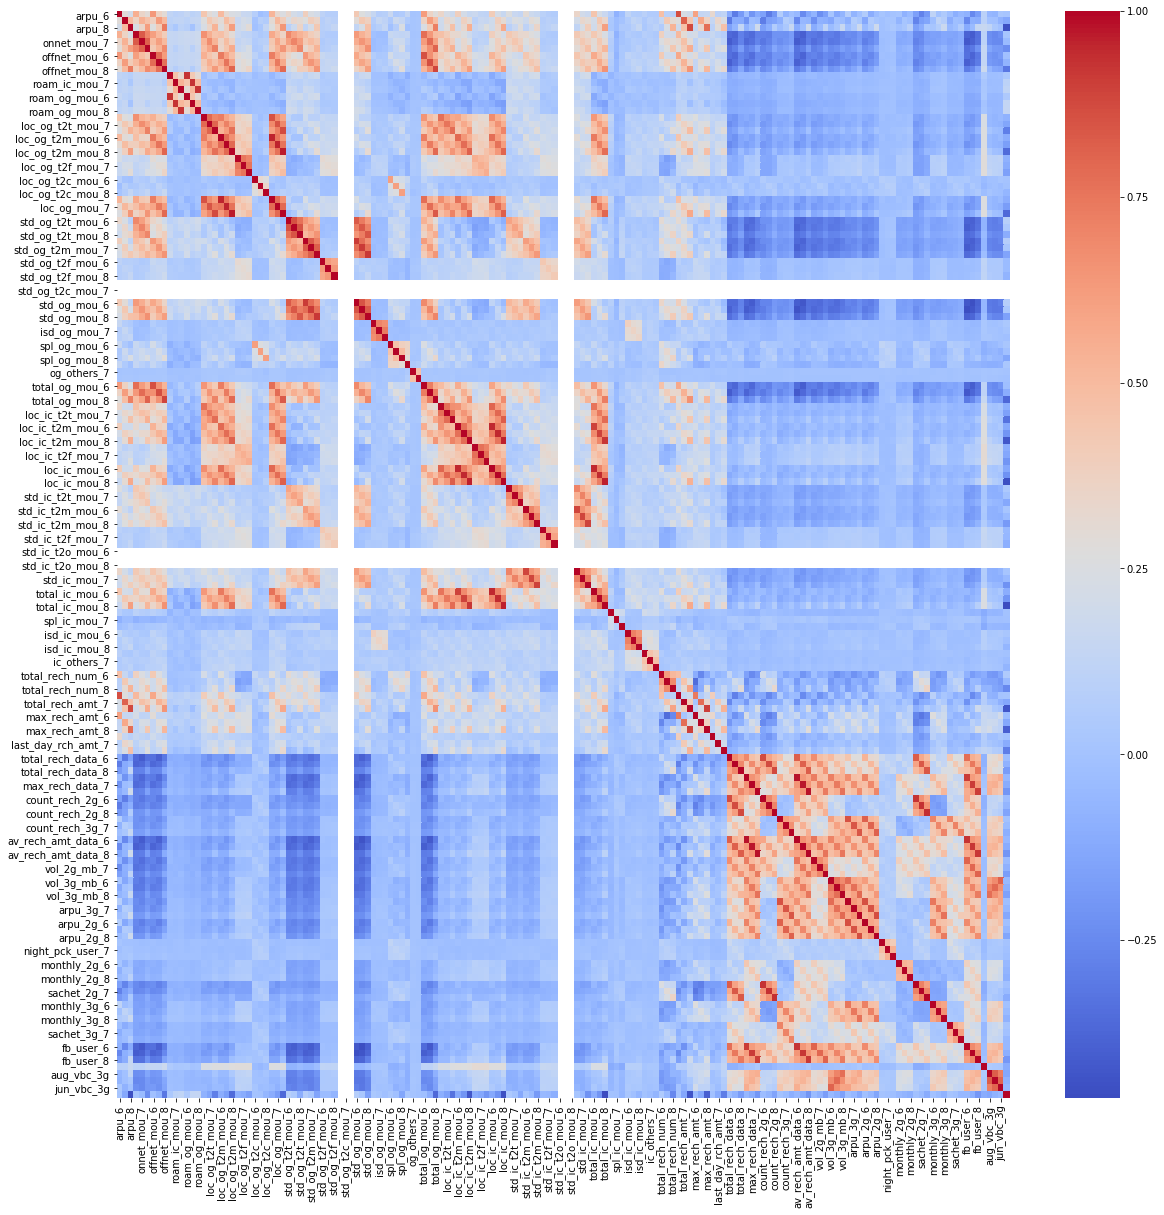

In [87]:
plt.figure(figsize = (20,20))     # Size of the figure
sns.heatmap(df.corr(), cmap='coolwarm')

#### PCA

`Dividing into X and Y sets for the model building`

In [88]:
#Dividing the training data into X and Y
y = df.pop('churn')
X = df

In [89]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [90]:
#Doing the PCA on the data
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [91]:
pca.components_

array([[-3.15155266e-02, -3.56390057e-02, -4.07346148e-02, ...,
         1.43686386e-01,  1.52212329e-01,  1.42445474e-01],
       [ 3.56863063e-02,  4.91292622e-02,  1.09767663e-01, ...,
         1.66902943e-01,  1.52364945e-01,  1.37792162e-01],
       [ 5.41718603e-03,  1.67200151e-02,  1.79238050e-02, ...,
         9.29836175e-02,  9.39354073e-02,  8.68426867e-02],
       ...,
       [ 0.00000000e+00, -9.10330856e-17, -2.25644818e-17, ...,
         6.56050322e-17, -6.37996045e-17, -3.26853184e-17],
       [ 0.00000000e+00, -1.09262639e-17,  4.96152361e-17, ...,
         7.65464761e-17,  7.46499817e-17, -3.84660505e-17],
       [ 0.00000000e+00, -1.54089897e-16,  6.96505351e-17, ...,
         2.74018924e-17, -2.41951648e-17, -1.14665084e-17]])

In [92]:
colnames = list(df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.031516,0.035686,arpu_6
1,-0.035639,0.049129,arpu_7
2,-0.040735,0.109768,arpu_8
3,-0.132626,0.066770,onnet_mou_6
4,-0.140970,0.079710,onnet_mou_7
5,-0.132126,0.120681,onnet_mou_8
6,-0.108874,0.079616,offnet_mou_6
7,-0.116805,0.093667,offnet_mou_7
8,-0.110900,0.140751,offnet_mou_8
9,-0.018838,0.003455,roam_ic_mou_6


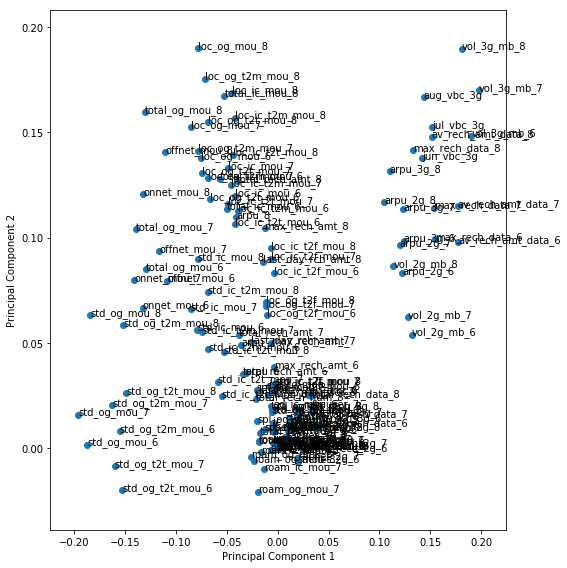

In [93]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

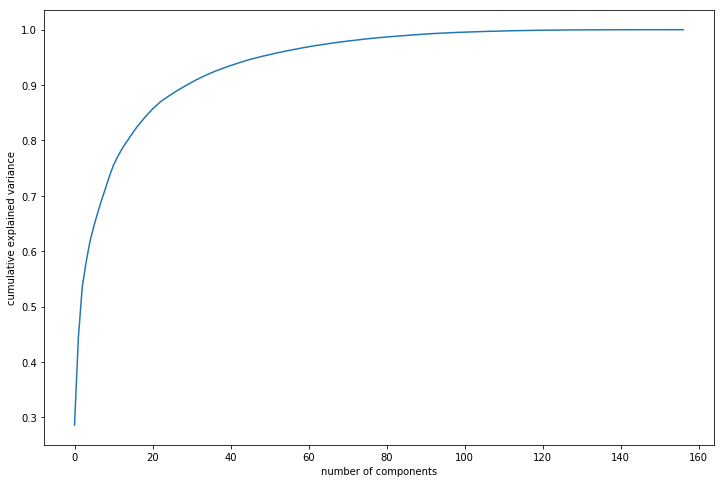

In [94]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

`About 95% of the variance is explained by approx 45 Principal Componenets`

In [95]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [96]:
#Basis transformation - getting the data onto our PCs
df_pca = pca_final.fit_transform(df)
df_pca.shape

(30001, 45)

In [97]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

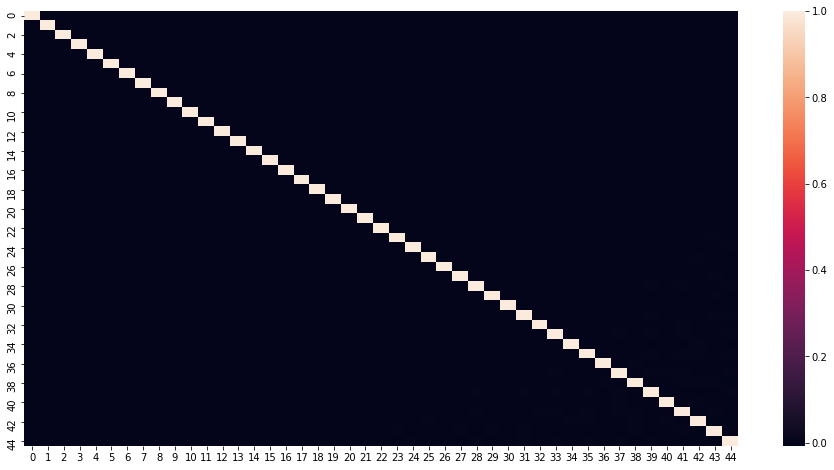

In [98]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (16,8))
sns.heatmap(corrmat,annot = False)
plt.show()

In [99]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.003395218371942022 , min corr:  -0.007267192313532772


`As expected there is little to no correlation.`

In [100]:
df_pca.shape

(30001, 45)

In [101]:
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PC'+str(x) for x in range(0,45)]
df_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,22.921942,-10.662228,5.887866,-2.764605,-5.047364,1.691101,1.706269,4.663053,0.005448,2.564355,...,1.714595,-0.856344,1.152374,0.778498,0.671082,-0.028890,-0.694065,0.581053,0.846660,-1.916835
1,-11.023385,5.152432,-2.539250,2.687138,-2.666614,-9.323353,-1.589678,2.028591,-7.335587,2.366719,...,0.913454,-0.952408,-0.259413,1.880190,-0.832000,0.879844,-0.829513,0.947671,0.002444,0.360801
2,-0.459009,-0.116439,3.562983,1.417800,-1.239283,4.459997,-5.237906,-5.200036,1.399692,-3.123764,...,0.543283,-1.224799,0.873120,0.791456,3.508221,2.278521,-0.594749,1.672557,0.195201,0.980838
3,-14.082074,-1.962920,3.210600,-0.705504,-0.960219,-3.649142,0.165057,1.235751,2.922484,-2.069694,...,0.106871,-0.505833,-0.074126,0.329364,0.029907,0.494158,-0.731866,-0.439558,0.444012,0.454701
4,4.710131,5.056800,-0.486750,-4.947320,-5.193417,-1.066911,-9.323971,-1.714649,2.110380,0.428022,...,1.465054,-0.118147,-0.624581,-3.265749,3.600842,-2.638769,-1.346585,0.797216,-0.700679,0.743867


### Lets fix the imablance in dataset first.

In [102]:
from imblearn.over_sampling import SMOTE

In [103]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [104]:
# Dividing into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
sm = SMOTE(random_state=42, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [106]:
# Check if it worked.
y_train.sum()/y_train.shape[0]

0.5

### Lets build a simple model first - Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [109]:
# Train Prediction
y_tr_pred = logreg.predict(X_train)

In [110]:
# Test Prediction
y_pred = logreg.predict(X_test)

In [111]:
# Train Confusion matrix 
confusion = confusion_matrix(y_train, y_tr_pred)
print(confusion)

[[18138  2512]
 [ 3025 17625]]


In [112]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[5989  921]
 [ 101  490]]


In [113]:
print('Train Accuracy: {}'.format(accuracy_score(y_train, y_tr_pred)))
print('Test Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

Train Accuracy: 0.8659322033898305
Test Accuracy: 0.8637514998000266


`We are not overfitting here.`

In [114]:
# ROC Curve
def draw_roc(y_test, y_pred):
    
    fpr, tpr,_ = roc_curve(y_test, y_pred, drop_intermediate = False)
    
    auc_score = roc_auc_score(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

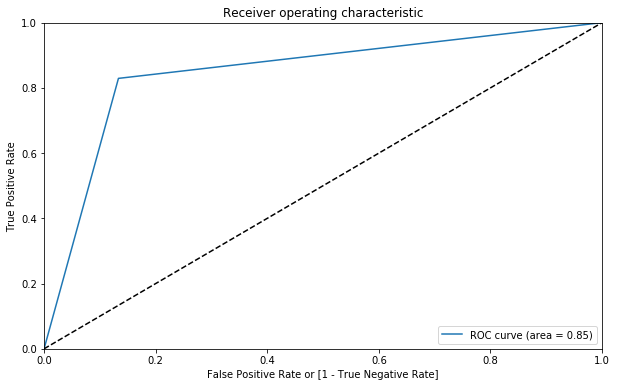

In [115]:
draw_roc(y_test, y_pred)

In [116]:
y_probs = logreg.predict_proba(X_test)

y_probs = pd.DataFrame(y_probs)

y_probs = y_probs.loc[:,[1]]

y_probs.columns = ['probs']

In [117]:
for cutoff in (.0,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,1):
    y_probs['At '+str(cutoff)] = [1]*y_probs.shape[0]
    y_probs.loc[y_probs['probs'].apply(lambda x: x<cutoff),'At '+str(cutoff)] = 0

In [118]:
y_probs.iloc[:,1:].apply(lambda x: roc_auc_score(y_test, x))

At 0.0     0.500000
At 0.05    0.654169
At 0.1     0.726261
At 0.2     0.798131
At 0.3     0.823095
At 0.4     0.842827
At 0.5     0.847909
At 0.6     0.840551
At 0.7     0.832258
At 0.8     0.811347
At 0.9     0.752415
At 0.95    0.690400
At 0.98    0.598100
At 1       0.500000
dtype: float64

### Random Forest

#### Fitting the Random Forest Model with default hyperparameters.

In [119]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [120]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
# Making predictions
predictions = rfc.predict(X_test)

In [122]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [123]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6910
           1       0.57      0.58      0.58       591

   micro avg       0.93      0.93      0.93      7501
   macro avg       0.77      0.77      0.77      7501
weighted avg       0.93      0.93      0.93      7501



Recall Score is only 0.60 which is very low.

In [124]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6653  257]
 [ 247  344]]


In [125]:
print(accuracy_score(y_test,predictions))

0.9328089588054926


Although the `accuracy` is very high: 0.93 <br>
We need to increase our `recall` score.

#### Grid Search to Find Optimal Hyperparameters

In [126]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [127]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [128]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 13.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**Fitting the final model with the best parameters obtained from grid search.**

In [129]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

In [146]:
# model with the best hyperparameters
rfc = RandomForestClassifier(max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [147]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
# predict
predictions = rfc.predict(X_test)

In [149]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6910
           1       0.45      0.77      0.57       591

   micro avg       0.91      0.91      0.91      7501
   macro avg       0.72      0.84      0.76      7501
weighted avg       0.94      0.91      0.92      7501



In [150]:
confusion = confusion_matrix(y_test,predictions)
print(confusion)

[[6362  548]
 [ 138  453]]


`Recall score: 0.77`

In [151]:
y_probs = rfc.predict_proba(X_test)

y_probs = pd.DataFrame(y_probs)

y_probs = y_probs.loc[:,[1]]

y_probs.columns = ['probs']

In [152]:
for cutoff in (.0,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,1):
    y_probs['At '+str(cutoff)] = [1]*y_probs.shape[0]
    y_probs.loc[y_probs['probs'].apply(lambda x: x<cutoff),'At '+str(cutoff)] = 0

In [153]:
def recall_scores(y_test, y_probs):
    confusion = confusion_matrix(y_test, y_probs)
    recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
    precision = confusion[1,1]/(confusion[1,1]+confusion[0,1])
    return recall, precision, confusion

In [154]:
recall_score = pd.DataFrame({'cutoff': (.0,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.98,1)})

In [155]:
recall = []
precision = []
conf = []
for col in y_probs.iloc[:,1:].columns:
    rec,pre,cmat = recall_scores(y_test, y_probs[col])
    recall.append(rec)
    precision.append(pre)
    conf.append(cmat)

In [156]:
recall_score['Recall'] = pd.Series(recall)
recall_score['Precision'] = pd.Series(precision)

In [157]:
recall_score = recall_score[:-1]

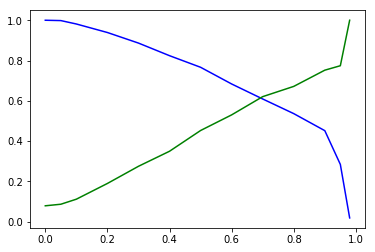

In [158]:
plt.plot(recall_score['cutoff'], recall_score['Recall'], 'b',recall_score['cutoff'], recall_score['Precision'],'g')

In [197]:
# Looking at the cutoff and confusion matrix we know that a good cutoff lies between 0.4 and 0.5
print('Confusion Matrix at cutoff 0.4')
print(conf[5])
print('\nConfusion Matrix at cutoff 0.5')
print(conf[6])


Confusion Matrix at cutoff 0.4
[[6289  621]
 [ 104  487]]

Confusion Matrix at cutoff 0.5
[[6314  596]
 [ 110  481]]


In [191]:
y_probs = rfc.predict_proba(X_test)
y_probs = pd.DataFrame(y_probs)
y_probs = y_probs.loc[:,[1]]
y_probs.columns = ['probs']
cutoffs = (.41,.42,.43,.44,.45,.46,.47,.48,.49,.5)
for cutoff in cutoffs:
    y_probs['At '+str(cutoff)] = [1]*y_probs.shape[0]
    y_probs.loc[y_probs['probs'].apply(lambda x: x<cutoff),'At '+str(cutoff)] = 0
recall = []
precision = []
conf = []
for col in y_probs.iloc[:,1:].columns:
    rec,pre,cmat = recall_scores(y_test, y_probs[col])
    recall.append(rec)
    precision.append(pre)
    conf.append(cmat)
for i,cutoff in enumerate(cutoffs):
    print('\nConfusion Matrix at '+str(cutoff)+' is-')
    print(conf[i])
    print('The recall score at '+str(cutoff)+' cutoff is: {:.2f} percent'.format(100*recall[i]))


Confusion Matrix at 0.41 is-
[[6111  799]
 [  84  507]]
The recall score at 0.41 cutoff is: 85.79 percent

Confusion Matrix at 0.42 is-
[[6149  761]
 [  86  505]]
The recall score at 0.42 cutoff is: 85.45 percent

Confusion Matrix at 0.43 is-
[[6193  717]
 [  88  503]]
The recall score at 0.43 cutoff is: 85.11 percent

Confusion Matrix at 0.44 is-
[[6221  689]
 [  95  496]]
The recall score at 0.44 cutoff is: 83.93 percent

Confusion Matrix at 0.45 is-
[[6258  652]
 [ 102  489]]
The recall score at 0.45 cutoff is: 82.74 percent

Confusion Matrix at 0.46 is-
[[6289  621]
 [ 104  487]]
The recall score at 0.46 cutoff is: 82.40 percent

Confusion Matrix at 0.47 is-
[[6314  596]
 [ 110  481]]
The recall score at 0.47 cutoff is: 81.39 percent

Confusion Matrix at 0.48 is-
[[6354  556]
 [ 115  476]]
The recall score at 0.48 cutoff is: 80.54 percent

Confusion Matrix at 0.49 is-
[[6378  532]
 [ 119  472]]
The recall score at 0.49 cutoff is: 79.86 percent

Confusion Matrix at 0.5 is-
[[6407  

In [199]:
# Here Looking at the Confusion Matrix Tells us that 0.5 is correct cutoff.
# Every 1 True Positive increases the False Positives 10 times.
# We can go as low as 0.47 in cutoff and below that.
print('The recall score at 0.41 cutoff is: {:.2f} percent'.format(100*recall[0]))

The recall score at 0.41 cutoff is: 85.79 percent


### Modelling for Feature Importances

In [162]:
# Balancing the data with original features.
sm = SMOTE(random_state=42, ratio=1.0)
X_train, y_train = sm.fit_sample(X, y)

In [163]:
# Using Hyperparameters from previous gridsearchCV
rfc = RandomForestClassifier(max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [164]:
# Fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [218]:
#Fetching the important featured using the feature_importance_

feature_importances = pd.DataFrame(rfc.feature_importances_,index = X.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [219]:
#Lets look at the most important features ranked in decending order.
feature_importances

,importance
total_ic_mou_8,0.078970
loc_ic_mou_8,0.057242
last_day_rch_amt_8,0.056217
loc_ic_t2m_mou_8,0.054035
roam_og_mou_8,0.053360
roam_ic_mou_8,0.048811
total_og_mou_8,0.041997
loc_ic_t2t_mou_8,0.038101
loc_og_mou_8,0.033204
total_rech_amt_8,0.032494


In [220]:
feature_importances = rfc.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - (%f)" % (f + 1, indices[f],feature_importances[indices[f]]))

Feature ranking:
1. feature 86 - (0.078970)
2. feature 68 - (0.057242)
3. feature 107 - (0.056217)
4. feature 62 - (0.054035)
5. feature 14 - (0.053360)
6. feature 11 - (0.048811)
7. feature 56 - (0.041997)
8. feature 59 - (0.038101)
9. feature 29 - (0.033204)
10. feature 101 - (0.032494)
11. feature 2 - (0.030484)
12. feature 104 - (0.029890)
13. feature 83 - (0.026254)
14. feature 17 - (0.025001)
15. feature 20 - (0.024487)
16. feature 110 - (0.021554)
17. feature 122 - (0.021091)
18. feature 113 - (0.020074)
19. feature 152 - (0.019856)
20. feature 65 - (0.017628)
21. feature 8 - (0.013591)
22. feature 116 - (0.013078)
23. feature 98 - (0.011272)
24. feature 125 - (0.011194)
25. feature 23 - (0.011092)
26. feature 5 - (0.010662)
27. feature 74 - (0.006907)
28. feature 49 - (0.006135)
29. feature 128 - (0.005664)
30. feature 154 - (0.005597)
31. feature 143 - (0.005434)
32. feature 134 - (0.004734)
33. feature 13 - (0.004698)
34. feature 44 - (0.004254)
35. feature 50 - (0.003819)
36

### Churn Indicators

1. Now we have a list of most important features with the value of importance arranged in decending order. 
2. These features based on the rank help you indicate if the person is going to churn or not.
3. You choose those features which have importance value >=0.02, that will indicate the churn.